<a href="https://colab.research.google.com/github/zahraa-m/PHE_UK/blob/Juliana/PHE_UK_juliana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the code below I have:

### - Changed Zahraa's code to check the difference in total quantity and cost of each category of medicines.
### - Checked the total mean quantity and mean cost per type of medicine per postcode in Greater Manchester.
### - Produced cross tables to calculate the total quantity and actual cost of each category of medicine per postcode in Greater Manchester.
### - Plotted the total quantity and actual cost of the category "Immunological products and vaccines" per postcode in Greater Manchester in 2020 and 2021.
### - Plotted the total quantity and actual cost of the category "Nutrition and blood" per postcode in Greater Manchester in 2020 and 2021.

In [19]:
# Importing the datasets
import pandas as pd
df_2020= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202004.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202104.csv')

# Creating a new column from the 'POSTCODE' column to contain only the first 3 digits of the postcode
df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]

#df_2020.head(5)

In [3]:
#calculate total quantity per type of medicine in each area in the Greater Manchester
TQ_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
TQ_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)

TQ_per_med_2020.to_csv("TQ_2020.csv")
TQ_per_med_2021.to_csv("TQ_2021.csv")


#calculate Cost per type of medicine in each area in the Greater Manchester
cost_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
cost_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)

#Delete the "All" row in the table
TQ_per_med_2020 = TQ_per_med_2020.drop(["All"], axis=0)
TQ_per_med_2021 = TQ_per_med_2021.drop(["All"], axis=0)

cost_per_med_2020 = cost_per_med_2020.drop(["All"], axis=0)
cost_per_med_2021 = cost_per_med_2021.drop(["All"], axis=0)

#Rename the All column to TQ_2020 and TQ_2021
TQ_per_med_2020 = TQ_per_med_2020.rename(columns={"All": "TQ_2020"})
TQ_per_med_2021 = TQ_per_med_2021.rename(columns={"All": "TQ_2021"})

cost_per_med_2020 = cost_per_med_2020.rename(columns={"All": "cost_2020"})
cost_per_med_2021 = cost_per_med_2021.rename(columns={"All": "cost_2021"})

#filter the tables to include only medicine's type and total quantity
df1 = TQ_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2020'])
df2 = TQ_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2021'])

#filter the tables to include only medicine's type and Cost
df3 = cost_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2020'])
df4 = cost_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2021'])

#find the difference between Total quantity of 2020 and 2021
TQ_per_drug_allyear = pd.merge(df1, df2, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_TQ = (df2['TQ_2021'] - df1['TQ_2020'] )
TQ_per_drug_allyear['diff_TQ']=diff_TQ.fillna(0) 

#find the percentage of the difference
diff_TQ_pct = (diff_TQ / df1['TQ_2020']) * 100
TQ_per_drug_allyear['diff_TQ_pct']=diff_TQ_pct.fillna(0)

#Filter zero differance in total quantity
TQ_per_drug_allyear= TQ_per_drug_allyear.query("diff_TQ>0")


#find the difference between cost of medicine in 2020 and 2021
cost_per_drug_allyear = pd.merge(df3, df4, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_cost = (df4['cost_2021'] - df3['cost_2020'])
cost_per_drug_allyear['diff_cost']= diff_cost.fillna(0)

#find the percentage of the difference
diff_cost_pct = (diff_cost / df3['cost_2020']) * 100
cost_per_drug_allyear['diff_cost_pct']= diff_cost_pct.fillna(0)

#Filter zero differance in cost
cost_per_drug_allyear=cost_per_drug_allyear.query("diff_cost>0")

In [4]:
#plot the difference between Total quantity of medicine in 2021 and 2020
import plotly.express as px
fig_TQ = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ',
                  labels={
                     "x": "Type of medicines",
                     "diff_TQ": "Total Quantity difference"},
                 title='Total Quantity difference between 2021 & 2020')
fig_TQ.show()

#plot the percentage of difference between Total quantity of medicine in 2021 and 2020
fig_TQ_pct = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_TQ_pct": "Total Quantity Increase %"},
                 title='Percentage increase of Total Quantity difference between 2021 & 2020')
fig_TQ_pct.update_traces(line_color='#F54730')
fig_TQ_pct.show()


#plot the cost difference between the medicine of 2021 and 2020
fig_cost = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost',
                    labels={
                       "x": "Type of Medicines",
                       "diff_cost": "Cost difference"},
                   title='Cost difference between 2021 & 2020')
fig_cost.show()

#plot the percentage of cost difference between the medicine of 2021 and 2020
fig_cost_pct = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_cost_pct": "Cost Increase %"},
                 title='Percentage increase of Cost difference between 2021 & 2020')
fig_cost_pct.update_traces(line_color='#F54730')
fig_cost_pct.show()

In [6]:
#filter per area_co, bnf_chapter_plus_code, total_quantity, actual_cost
a_2020 = df_2020.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]
a_2021 = df_2021.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]

#print(a_2020.head(4))
#print(a_2020.shape)

# Checking the mean quantity of medicines for each postcode
quantity_per_area_2020 = a_2020.groupby('area_co')['TOTAL_QUANTITY'].mean()
quantity_per_area_2021 = a_2021.groupby('area_co')['TOTAL_QUANTITY'].mean()

print(quantity_per_area_2020)
print(quantity_per_area_2021)

# Checking the Actual cost of medicines in total for each postcode
cost_per_area_2020 = a_2020.groupby('area_co')['ACTUAL_COST'].mean()
cost_per_area_2021 = a_2021.groupby('area_co')['ACTUAL_COST'].mean()

print(cost_per_area_2020)
print(cost_per_area_2021)

area_co
M1     228.990623
M11    487.078564
M12    550.989604
M13    448.453683
M14    443.773614
M15    525.078895
M16    509.255814
M18    456.092398
M19    431.901856
M20    448.554846
M21    430.946356
M22    457.870084
M23    396.568281
M30     30.000000
M33    141.815385
M34    100.446309
M4     574.770671
M40    493.030605
M8     624.347965
M9     479.897317
WA1     19.666667
Name: TOTAL_QUANTITY, dtype: float64
area_co
L35    134.666667
M1     224.933626
M11    503.713635
M12    507.736632
M13    478.437820
M14    464.473711
M15    474.028008
M16    505.263650
M18    469.283441
M19    479.602201
M20    441.280840
M21    415.702214
M22    482.926700
M23    381.788925
M33    158.475439
M34     78.515789
M4     481.524483
M40    490.573416
M8     585.182157
M9     475.048142
WA2     64.714286
WN2     97.150000
WN3     34.500000
WN7     34.291209
Name: TOTAL_QUANTITY, dtype: float64
area_co
M1     28.967217
M11    35.248864
M12    37.637076
M13    32.106003
M14    34.336860
M15    

In [38]:
#Generating a crosstable with the total quantity of each category of medicine per postcode in 2020
TQ3_per_med_2020 = pd.crosstab(index=a_2020['area_co'], columns=a_2020['BNF_CHAPTER_PLUS_CODE'], values=a_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2020 = TQ3_per_med_2020.reset_index()
TQ4_per_med_2020 = TQ4_per_med_2020.drop("All", axis = 1)
#print(TQ4_per_med_2020.head(2))

#Generating a crosstable with the total quantity of each category of medicine per postcode in 2021
TQ3_per_med_2021 = pd.crosstab(index=a_2021['area_co'], columns=a_2021['BNF_CHAPTER_PLUS_CODE'], values=a_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2021 = TQ3_per_med_2021.reset_index()
TQ4_per_med_2021 = TQ4_per_med_2021.drop("All", axis = 1)
#print(TQ4_per_med_2021.info)

In [39]:
#Generating a crosstable with the actual cost of each category of medicine per postcode in 2020
AC_per_med_2020 = pd.crosstab(index=a_2020['area_co'], columns=a_2020['BNF_CHAPTER_PLUS_CODE'], values=a_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
AC1_per_med_2020 = AC_per_med_2020.reset_index()
#AC1_per_med_2020 = AC_per_med_2020.drop("All", axis = 1)
#print(AC1_per_med_2020.head(2))

#Generating a crosstable with the actual cost of each category of medicine per postcode in 2021
AC_per_med_2021 = pd.crosstab(index=a_2021['area_co'], columns=a_2021['BNF_CHAPTER_PLUS_CODE'], values=a_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ5_per_med_2021)
AC1_per_med_2021 = AC_per_med_2021.reset_index()
#AC1_per_med_2021 = AC_per_med_2021.drop("All", axis = 1)
#print(AC1_per_med_2021.info)

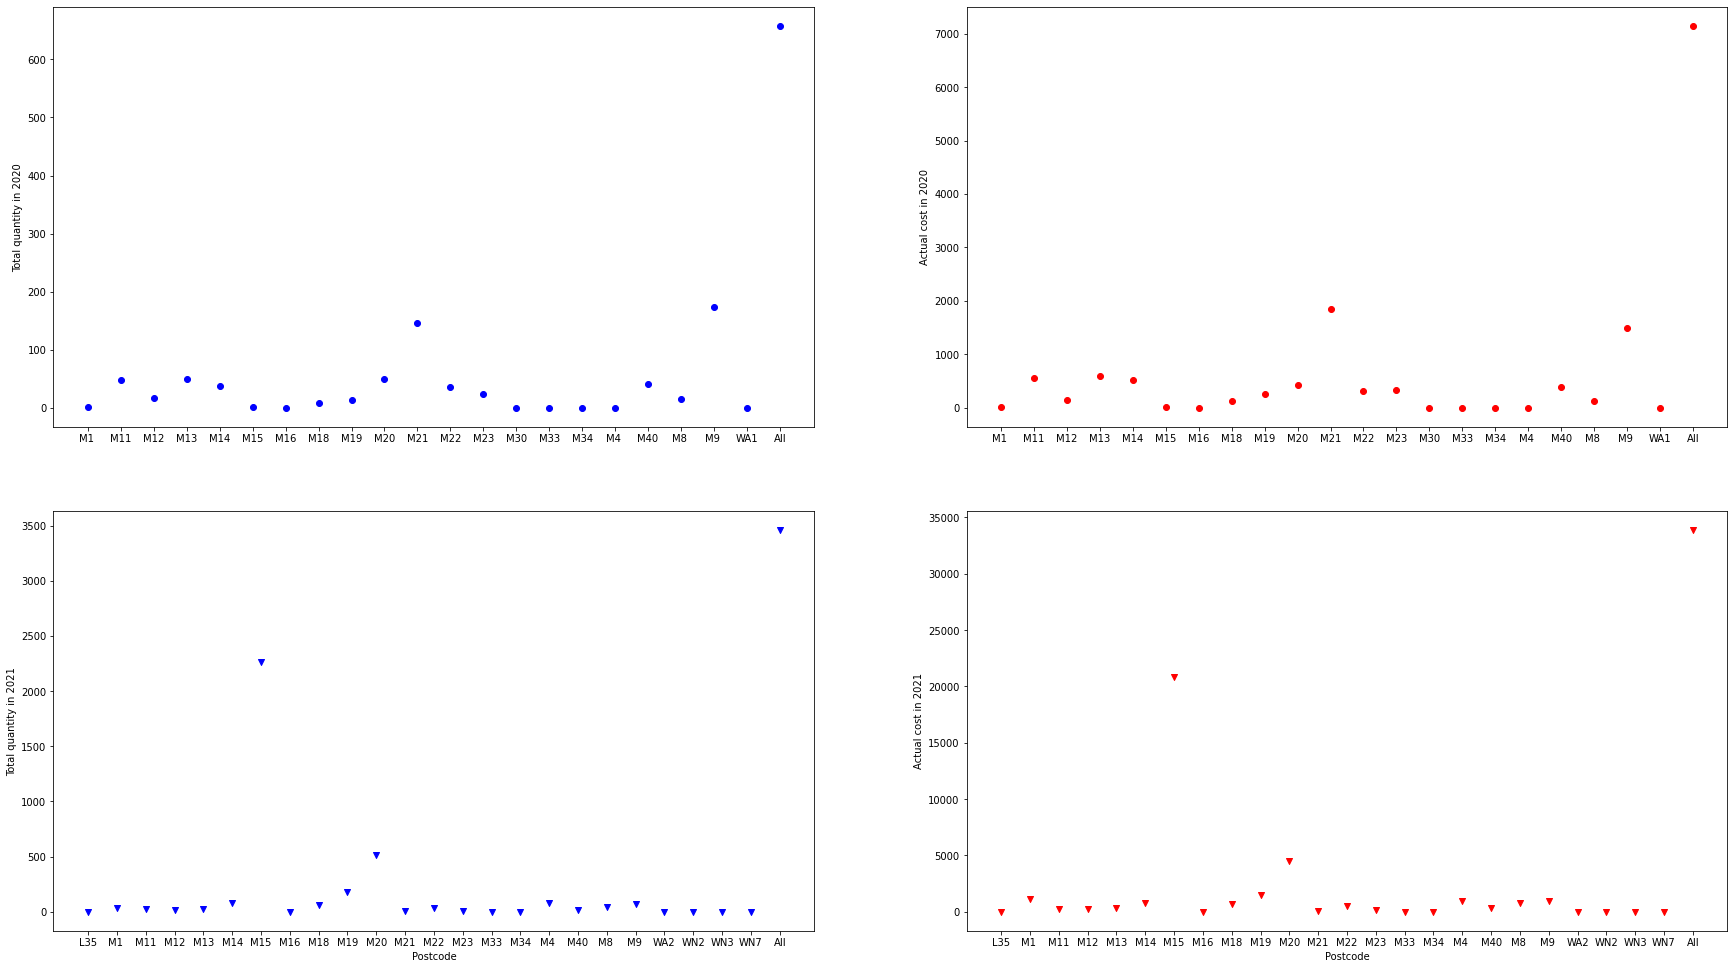

In [35]:
#Plotting the total quantity and actual cost of the category "Immunological products and vaccines" per postcode in Greater Manchester in 2020 and 2021
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 2, sharey = False)
ax[0,0].figure.set_figwidth(30)
ax[0,0].figure.set_figheight(17)
ax[0,0].scatter(TQ4_per_med_2020['area_co'], TQ4_per_med_2020['14: Immunological Products and Vaccines'], color = 'b', marker = 'o')
ax[1,0].scatter(TQ4_per_med_2021['area_co'], TQ4_per_med_2021['14: Immunological Products and Vaccines'], color = 'b', marker = 'v')
ax[0,1].scatter(AC1_per_med_2020['area_co'], AC1_per_med_2020['14: Immunological Products and Vaccines'], color = 'r', marker = 'o')
ax[1,1].scatter(AC1_per_med_2021['area_co'], AC1_per_med_2021['14: Immunological Products and Vaccines'], color = 'r', marker = 'v')
ax[0,0].set_ylabel("Total quantity in 2020")
ax[1,0].set_ylabel("Total quantity in 2021")
ax[0,1].set_ylabel("Actual cost in 2020")
ax[1,1].set_ylabel("Actual cost in 2021")
ax[1,0].set_xlabel("Postcode")
ax[1,1].set_xlabel("Postcode")
#ax[0].title("Total quantity of Immunological Products and Vaccines in April 2021 according to the postcode")
plt.show()

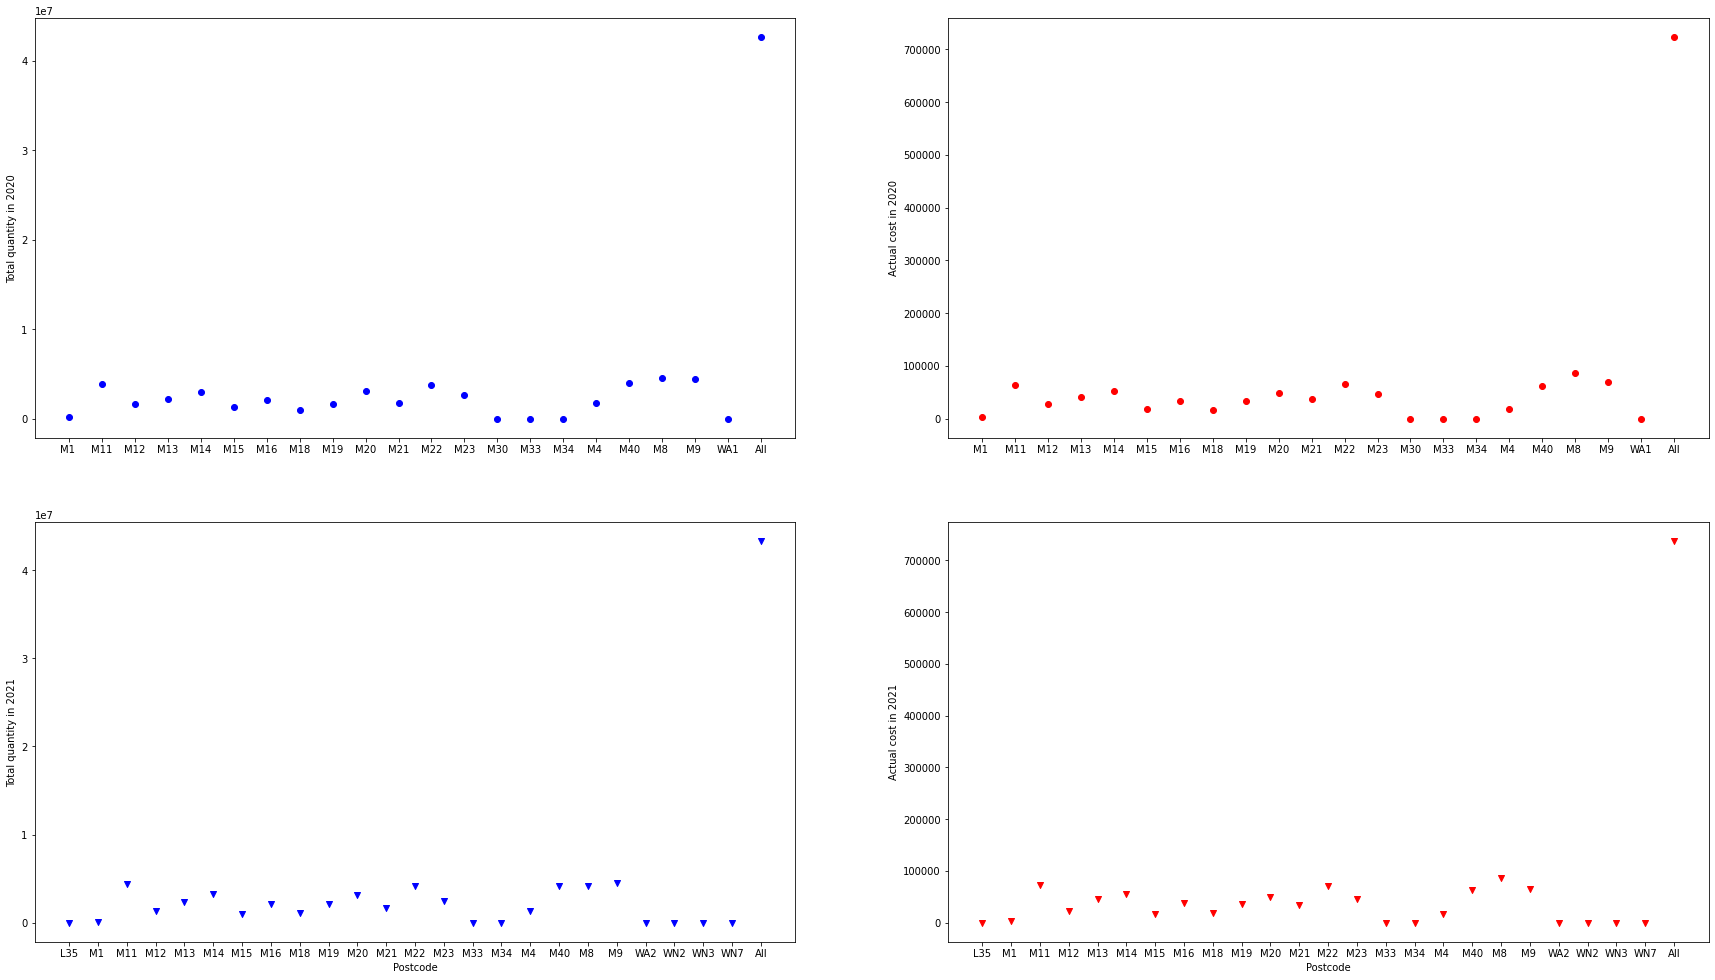

In [37]:
#Plots for Nutrition and blood

fig, ax = plt.subplots(2, 2, sharey = False)
ax[0,0].figure.set_figwidth(30)
ax[0,0].figure.set_figheight(17)
ax[0,0].scatter(TQ4_per_med_2020['area_co'], TQ4_per_med_2020['09: Nutrition and Blood'], color = 'b', marker = 'o')
ax[1,0].scatter(TQ4_per_med_2021['area_co'], TQ4_per_med_2021['09: Nutrition and Blood'], color = 'b', marker = 'v')
ax[0,1].scatter(AC1_per_med_2020['area_co'], AC1_per_med_2020['09: Nutrition and Blood'], color = 'r', marker = 'o')
ax[1,1].scatter(AC1_per_med_2021['area_co'], AC1_per_med_2021['09: Nutrition and Blood'], color = 'r', marker = 'v')
ax[0,0].set_ylabel("Total quantity in 2020")
ax[1,0].set_ylabel("Total quantity in 2021")
ax[0,1].set_ylabel("Actual cost in 2020")
ax[1,1].set_ylabel("Actual cost in 2021")
ax[1,0].set_xlabel("Postcode")
ax[1,1].set_xlabel("Postcode")
#ax[0].title("Total quantity of Immunological Products and Vaccines in April 2021 according to the postcode")
plt.show()